In [1]:
import numpy as np
from pythtb import TBModel, Lattice
import matplotlib.pyplot as plt

In [2]:
lat_vecs = [[0, 1, 1], [1, 0, 1], [1, 1, 0]]
orb_vecs = [[0, 0, 0], [0.25, 0.25, 0.25]]
lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=...)

model = TBModel(lattice=lat, spinful=True)

# fixed parameters
t = 1.0
soc = 1 / 4
m = 1 / 2

# Staggered Zeeman term along (111)
# same magnitude for sigma_x,y,z on each site with opposite sign on the two sites
model.set_onsite(
    lambda beta: [0, m * np.sin(beta), m * np.sin(beta), m * np.sin(beta)],
    ind_i=0,
)  # site 0
model.set_onsite(
    lambda beta: [0, -m * np.sin(beta), -m * np.sin(beta), -m * np.sin(beta)],
    ind_i=1,
)  # site 1

# spin-independent first-neighbor hops
for lvec in ([-1, 0, 0], [0, -1, 0], [0, 0, -1]):
    model.set_hop(t, 0, 1, lvec)

# modulated first-neighbor hop along (111)
model.set_hop(lambda beta: 3 * t + m * np.cos(beta), 0, 1, [0, 0, 0], mode="set")

# spin-dependent second-neighbor hops
lvec_list = ([1, 0, 0], [0, 1, 0], [0, 0, 1], [-1, 1, 0], [0, -1, 1], [1, 0, -1])
dir_list = ([0, 1, -1], [-1, 0, 1], [1, -1, 0], [1, 1, 0], [0, 1, 1], [1, 0, 1])
for j in range(6):
    spin = np.array([0.0] + dir_list[j])
    model.set_hop(1j * soc * spin, 0, 0, lvec_list[j])
    model.set_hop(-1j * soc * spin, 1, 1, lvec_list[j])

print(model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 3
periodic directions         = [0, 1, 2]
spinful                     = True
number of spin components   = 2
number of electronic states = 4
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 0.000,  1.000,  1.000]
  # 1 ===> [ 1.000,  0.000,  1.000]
  # 2 ===> [ 1.000,  1.000,  0.000]
Volume of unit cell (Cartesian) = 2.000 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [-3.142,  3.142,  3.142]
  # 1 ===> [ 3.142, -3.142,  3.142]
  # 2 ===> [ 3.142,  3.142, -3.142]
Volume of reciprocal unit cell = 124.025 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.000,  0.000,  0.000]
  # 1 ===> [ 0.500,  0.500,  0.500]

Orbital vectors (fractional):
  # 0 ===> [ 0.000,  0.000,  0.000]
  # 1 ===> [ 0.250,  0.250,  0.250]
----------------------------------------
Site energies:


In [3]:
nks = 40, 40, 40
n_beta = 21
betas = np.linspace(0, 2 * np.pi, n_beta, endpoint=True)
param_periods = {"beta": 2 * np.pi}

print(f"Total number of points: {nks[0] * nks[1] * nks[2] * n_beta}")

Total number of points: 1344000


In [4]:
betas, axion, c2 = model.axion_angle(
    nks=nks,
    param_periods=param_periods,
    return_second_chern=True,
    use_tensorflow=True,
    diff_scheme="central",
    diff_order=8,
    beta=betas,
)

In [5]:
print(f"Second Chern number C2 = {c2}")

Second Chern number C2 = 1.00011146068573


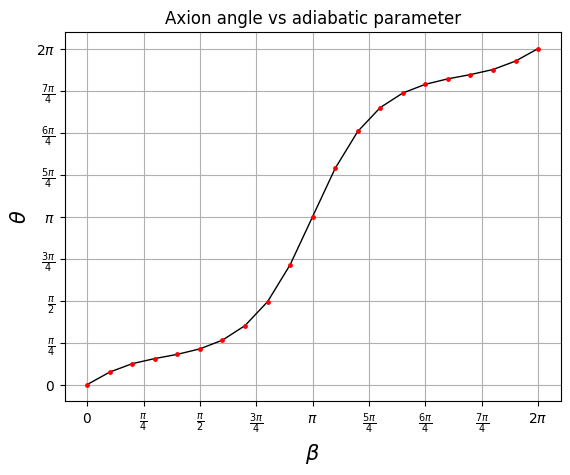

In [6]:
fig, ax = plt.subplots()

ax.set_xlabel(r"$\beta$", size=15)
ax.set_ylabel(r"$\theta$", size=15)

tick_positions = np.arange(0, 2 * np.pi + np.pi / 4, np.pi / 4)
tick_labels = [
    r"$0$",
    r"$\frac{\pi}{4}$",
    r"$\frac{\pi}{2}$",
    r"$\frac{3\pi}{4}$",
    r"$\pi$",
    r"$\frac{5\pi}{4}$",
    r"$\frac{6\pi}{4}$",
    r"$\frac{7\pi}{4}$",
    r"$2\pi$",
]

# Set the ticks and labels for both axes
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_labels)

## Riemann sum
ax.plot(betas, axion, lw=1, zorder=2, c="k")
ax.scatter(betas, axion, s=6, zorder=2, c="r")

ax.grid()
ax.set_title("Axion angle vs adiabatic parameter", size=12)
plt.show()